In [1]:
import sklearn
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import tensorflow as tf

# Desabilitar o uso da GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

2024-08-29 14:44:14.131165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 14:44:14.131432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 14:44:14.355978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 14:44:14.979374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 14:44:20.677483: W tensorflow/compiler/tf2

In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


2024-08-29 14:44:25.660033: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-08-29 14:44:25.660155: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: renan-Latitude-3450
2024-08-29 14:44:25.660195: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: renan-Latitude-3450
2024-08-29 14:44:25.660486: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.183.1
2024-08-29 14:44:25.660573: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.183.1
2024-08-29 14:44:25.660596: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.183.1


# Perceptrons

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1], dtype=int32)

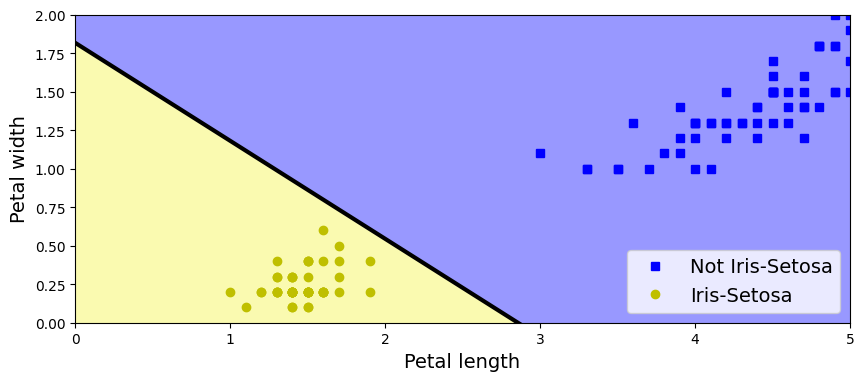

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

# Building an Image Classifier

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.15.0'

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

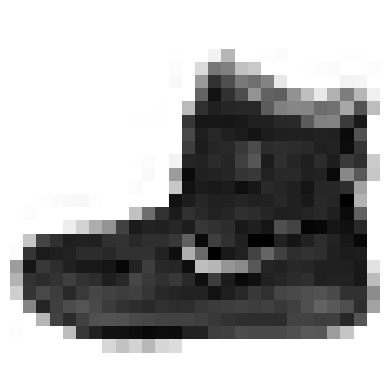

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
# Let's see what is the labels
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [14]:
# Corresponding class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Ankle boot'

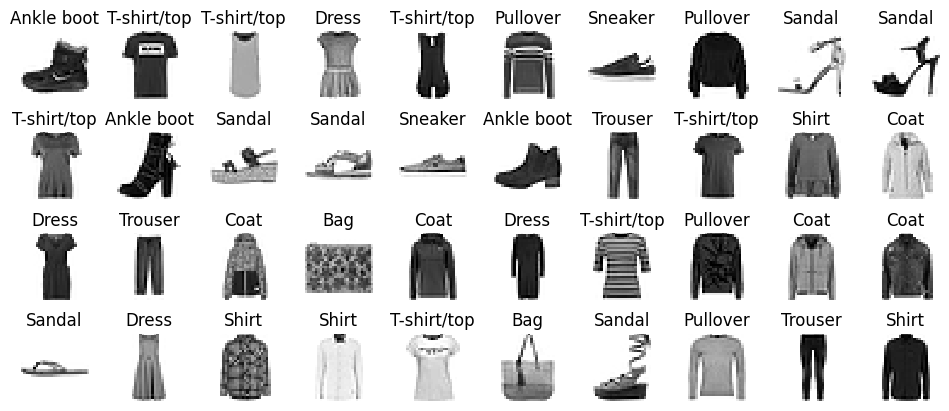

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
with tf.device('/CPU:0'):
    # Defina e treine seu modelo aqui
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[-0.00690325,  0.07298833, -0.05814259, ..., -0.01378455,
        -0.05909323, -0.04338825],
       [ 0.04837821, -0.00707345,  0.07428084, ...,  0.04733723,
         0.00159671, -0.00380711],
       [ 0.05680604, -0.03513096, -0.0159522 , ...,  0.03726457,
         0.04272671, -0.05859164],
       ...,
       [-0.02655172,  0.03856832,  0.05207118, ...,  0.06955434,
        -0.0263874 ,  0.0168623 ],
       [ 0.04029992, -0.05980252, -0.04682197, ...,  0.03854104,
         0.00983438,  0.04397748],
       [ 0.0270108 , -0.0139998 ,  0.06196873, ...,  0.05570033,
        -0.03559787, -0.04284667]], dtype=float32)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2024-08-29 14:44:33.987908: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7282 - accuracy: 0.7578 - val_loss: 0.5131 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4905 - accuracy: 0.8304 - val_loss: 0.4733 - val_accuracy: 0.8292
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8441 - val_loss: 0.4289 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4193 - accuracy: 0.8528 - val_loss: 0.4003 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8601 - val_loss: 0.3998 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3815 - accuracy: 0.8649 - val_loss: 0.4005 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8695 - val_loss: 0.3753 - val_accuracy:

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

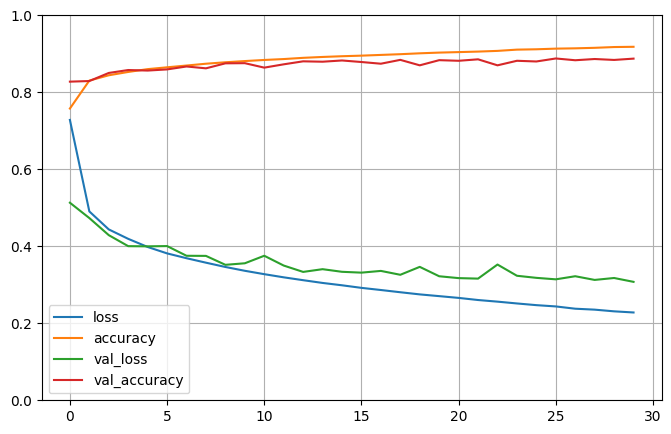

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

 42/313 [===>..........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8951

2024-08-29 14:47:02.994920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8839


[0.32465457916259766, 0.883899986743927]

In [31]:
X_new = X_test[:3]

In [32]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 145ms/step


array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Regression MLP

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1140 - val_loss: 1.0242
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9114 - val_loss: 0.8569
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8188 - val_loss: 0.8086
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7671 - val_loss: 0.7443
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7274 - val_loss: 0.7145
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6914 - val_loss: 0.6825
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6630 - val_loss: 0.6884
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6383 - val_loss: 0.6301
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6133 - val_loss: 0.5940
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5917 - val_loss: 0.6371

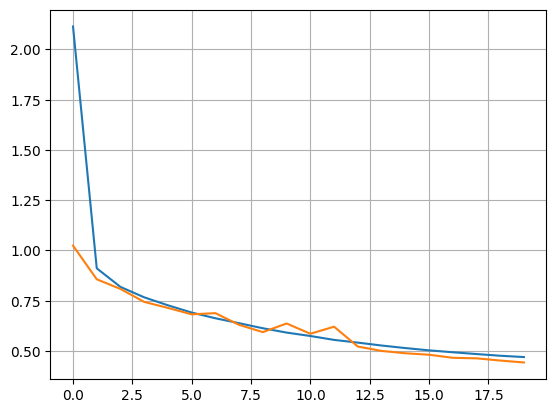

In [37]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [38]:
y_pred

array([[0.64164424],
       [1.4424266 ],
       [3.0589974 ]], dtype=float32)

# Complex Models using Functional API

In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1731 - root_mean_squared_error: 1.0831 - val_loss: 0.4725 - val_root_mean_squared_error: 0.6874
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - root_mean_squared_error: 0.6628 - val_loss: 0.5906 - val_root_mean_squared_error: 0.7685
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3916 - root_mean_squared_error: 0.6258 - val_loss: 0.3861 - val_root_mean_squared_error: 0.6213
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3737 - root_mean_squared_error: 0.6113 - val_loss: 0.3695 - val_root_mean_squared_error: 0.6078
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3601 - root_mean_squared_error: 0.6001 - val_loss: 0.3455 - val_root_mean_squared_error: 0.5878
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3503 - root_mean_squared_error: 0.5919 - val_loss: 0.5934 - val_

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [44]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                      outputs=[output, aux_output])

In [45]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [46]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
             metrics=["RootMeanSquaredError"])

In [47]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4509 - dense_2_loss: 1.3528 - dense_3_loss: 2.3339 - dense_2_root_mean_squared_error: 1.1631 - dense_3_root_mean_squared_error: 1.5277 - val_loss: 1.9424 - val_dense_2_loss: 1.8832 - val_dense_3_loss: 2.4750 - val_dense_2_root_mean_squared_error: 1.3723 - val_dense_3_root_mean_squared_error: 1.5732
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5262 - dense_2_loss: 0.4905 - dense_3_loss: 0.8473 - dense_2_root_mean_squared_error: 0.7004 - dense_3_root_mean_squared_error: 0.9205 - val_loss: 2.1738 - val_dense_2_loss: 2.2636 - val_dense_3_loss: 1.3651 - val_dense_2_root_mean_squared_error: 1.5045 - val_dense_3_root_mean_squared_error: 1.1684
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4708 - dense_2_loss: 0.4494 - dense_3_loss: 0.6628 - dense_2_root_mean_squared_error: 0.6704 - dense_3_root_mean_squared_error: 0.8141 - val_loss: 0.4514 - val_dense_2_loss

### Using the Subclassing API to Build Dynamic Models

In [48]:
class WideAndDeepModel(tf.keras.Model):
    def  __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
             metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8850 - output_1_loss: 1.8944 - output_2_loss: 1.8007 - output_1_root_mean_squared_error: 1.3764 - output_2_root_mean_squared_error: 1.3419 - val_loss: 1.2624 - val_output_1_loss: 0.8338 - val_output_2_loss: 5.1202 - val_output_1_root_mean_squared_error: 0.9131 - val_output_2_root_mean_squared_error: 2.2628
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - output_1_loss: 0.6513 - output_2_loss: 0.7182 - output_1_root_mean_squared_error: 0.8071 - output_2_root_mean_squared_error: 0.8475 - val_loss: 1.3527 - val_output_1_loss: 0.9453 - val_output_2_loss: 5.0193 - val_output_1_root_mean_squared_error: 0.9722 - val_output_2_root_mean_squared_error: 2.2404
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5410 - output_1_loss: 0.5330 - output_2_loss: 0.6127 - output_1_root_mean_squared_error: 0.7301 - output_2_root_mean_squared_error: 0.7828 - val_loss: 0.956

### Saving and Restoring a Model

In [50]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [51]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [53]:
# To show the contents og my_keras_model
from pathlib import Path
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [54]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 67ms/step


### Using Callbacks

In [55]:
shutil.rmtree("my_checkpoints", ignore_errors=True)

In [57]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                  save_best_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
359/363 [============================>.] - ETA: 0s - loss: 0.3281 - output_1_loss: 0.3223 - output_2_loss: 0.3810 - output_1_root_mean_squared_error: 0.5677 - output_2_root_mean_squared_error: 0.6173INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.3289 - output_1_loss: 0.3230 - output_2_loss: 0.3822 - output_1_root_mean_squared_error: 0.5683 - output_2_root_mean_squared_error: 0.6182 - val_loss: 0.3396 - val_output_1_loss: 0.3368 - val_output_2_loss: 0.3644 - val_output_1_root_mean_squared_error: 0.5804 - val_output_2_root_mean_squared_error: 0.6037
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3337 - output_1_loss: 0.3281 - output_2_loss: 0.3834 - output_1_root_mean_squared_error: 0.5728 - output_2_root_mean_squared_error: 0.6192 - val_loss: 0.5360 - val_output_1_loss: 0.5206 - val_output_2_loss: 0.6751 - val_output_1_root_mean_squared_error: 0.7215 - val_output_2_root_mean_squared_error: 0.8216
Epoch 3/10
354/363 [============================>.] - ETA: 0s - loss: 0.3274 - output_1_loss: 0.3218 - output_2_loss: 0.3780 - output_1_root_mean_squared_error: 0.5672 - output_2_root_mean_squared_error: 0.6148INFO:tensorflow:Assets written to

INFO:tensorflow:Assets written to: my_checkpoints/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3267 - output_1_loss: 0.3211 - output_2_loss: 0.3773 - output_1_root_mean_squared_error: 0.5666 - output_2_root_mean_squared_error: 0.6143 - val_loss: 0.3211 - val_output_1_loss: 0.3156 - val_output_2_loss: 0.3707 - val_output_1_root_mean_squared_error: 0.5618 - val_output_2_root_mean_squared_error: 0.6089
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3274 - output_1_loss: 0.3217 - output_2_loss: 0.3784 - output_1_root_mean_squared_error: 0.5672 - output_2_root_mean_squared_error: 0.6151 - val_loss: 0.3352 - val_output_1_loss: 0.3230 - val_output_2_loss: 0.4451 - val_output_1_root_mean_squared_error: 0.5683 - val_output_2_root_mean_squared_error: 0.6672
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3288 - output_1_loss: 0.3236 - output_2_loss: 0.3754 - output_1_root_mean_squared_error: 0.5688 - output_2_root_mean_squared_error: 0.6127 - val_loss: 0.4841 - val_out

In [58]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)

hystory = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3191 - output_1_loss: 0.3137 - output_2_loss: 0.3676 - output_1_root_mean_squared_error: 0.5601 - output_2_root_mean_squared_error: 0.6063 - val_loss: 0.3389 - val_output_1_loss: 0.3346 - val_output_2_loss: 0.3768 - val_output_1_root_mean_squared_error: 0.5785 - val_output_2_root_mean_squared_error: 0.6138
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3219 - output_1_loss: 0.3168 - output_2_loss: 0.3676 - output_1_root_mean_squared_error: 0.5628 - output_2_root_mean_squared_error: 0.6063 - val_loss: 0.5259 - val_output_1_loss: 0.5064 - val_output_2_loss: 0.7012 - val_output_1_root_mean_squared_error: 0.7116 - val_output_2_root_mean_squared_error: 0.8374
Epoch 3/100
343/363 [===========================>..] - ETA: 0s - loss: 0.3211 - output_1_loss: 0.3159 - output_2_loss: 0.3674 - output_1_root_mean_squared_error: 0.5621 - output_2_root_mean_squared_error: 0.6061INFO:tensorflow:Ass

INFO:tensorflow:Assets written to: my_checkpoints/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3178 - output_1_loss: 0.3126 - output_2_loss: 0.3638 - output_1_root_mean_squared_error: 0.5591 - output_2_root_mean_squared_error: 0.6031 - val_loss: 0.3094 - val_output_1_loss: 0.3024 - val_output_2_loss: 0.3732 - val_output_1_root_mean_squared_error: 0.5499 - val_output_2_root_mean_squared_error: 0.6109
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3184 - output_1_loss: 0.3132 - output_2_loss: 0.3657 - output_1_root_mean_squared_error: 0.5596 - output_2_root_mean_squared_error: 0.6047 - val_loss: 0.3274 - val_output_1_loss: 0.3232 - val_output_2_loss: 0.3648 - val_output_1_root_mean_squared_error: 0.5685 - val_output_2_root_mean_squared_error: 0.6040
Epoch 5/100
362/363 [============================>.] - ETA: 0s - loss: 0.3211 - output_1_loss: 0.3164 - output_2_loss: 0.3633 - output_1_root_mean_squared_error: 0.5625 - output_2_root_mean_squared_error: 0.6027INFO:tensorflow:Assets written 

INFO:tensorflow:Assets written to: my_checkpoints/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3213 - output_1_loss: 0.3166 - output_2_loss: 0.3635 - output_1_root_mean_squared_error: 0.5627 - output_2_root_mean_squared_error: 0.6029 - val_loss: 0.3043 - val_output_1_loss: 0.2969 - val_output_2_loss: 0.3709 - val_output_1_root_mean_squared_error: 0.5449 - val_output_2_root_mean_squared_error: 0.6091
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3149 - output_1_loss: 0.3097 - output_2_loss: 0.3612 - output_1_root_mean_squared_error: 0.5565 - output_2_root_mean_squared_error: 0.6010 - val_loss: 0.4955 - val_output_1_loss: 0.4701 - val_output_2_loss: 0.7239 - val_output_1_root_mean_squared_error: 0.6857 - val_output_2_root_mean_squared_error: 0.8508
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3210 - output_1_loss: 0.3159 - output_2_loss: 0.3673 - output_1_root_mean_squared_error: 0.5620 - output_2_root_mean_squared_error: 0.6060 - val_loss: 0.4237 - val_o

INFO:tensorflow:Assets written to: my_checkpoints/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3111 - output_1_loss: 0.3062 - output_2_loss: 0.3560 - output_1_root_mean_squared_error: 0.5533 - output_2_root_mean_squared_error: 0.5967 - val_loss: 0.2993 - val_output_1_loss: 0.2928 - val_output_2_loss: 0.3579 - val_output_1_root_mean_squared_error: 0.5411 - val_output_2_root_mean_squared_error: 0.5983
Epoch 12/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3129 - output_1_loss: 0.3079 - output_2_loss: 0.3578 - output_1_root_mean_squared_error: 0.5549 - output_2_root_mean_squared_error: 0.5981 - val_loss: 0.6369 - val_output_1_loss: 0.6286 - val_output_2_loss: 0.7117 - val_output_1_root_mean_squared_error: 0.7928 - val_output_2_root_mean_squared_error: 0.8436
Epoch 13/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3117 - output_1_loss: 0.3066 - output_2_loss: 0.3570 - output_1_root_mean_squared_error: 0.5538 - output_2_root_mean_squared_error: 0.5975 - val_loss: 0.3009 - val

In [59]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [60]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.02
Epoch=1, val/train=1.91
Epoch=2, val/train=0.97
Epoch=3, val/train=1.10
Epoch=4, val/train=0.98
Epoch=5, val/train=1.97
Epoch=6, val/train=1.17
Epoch=7, val/train=1.86
Epoch=8, val/train=1.03
Epoch=9, val/train=1.77


### Using TensorBoard for Visualization

In [62]:
# isntaling the tensorboard-plugin-profile
import sys
if "google.colab" in sys.modules:
    %pip install -q -U ternsorboard-plugin-profile

In [63]:
shutil.rmtree("my_logs", ignore_errors=True)

In [64]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [65]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [67]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                               profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/20


2024-08-29 16:05:41.176697: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-08-29 16:05:41.176767: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-08-29 16:05:41.177769: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


196/363 [===============>..............] - ETA: 0s - loss: 2.6743 - root_mean_squared_error: 1.6353

2024-08-29 16:05:42.004158: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-08-29 16:05:42.004188: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-08-29 16:05:42.190359: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.


252/363 [===================>..........] - ETA: 0s - loss: 2.4804 - root_mean_squared_error: 1.5749

2024-08-29 16:05:42.211326: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-08-29 16:05:42.260388: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2024_08_29_16_00_48/plugins/profile/2024_08_29_16_05_42/renan-Latitude-3450.xplane.pb


363/363 [==============================] - 2s 3ms/step - loss: 2.0372 - root_mean_squared_error: 1.4273 - val_loss: 1.0125 - val_root_mean_squared_error: 1.0062
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8299 - root_mean_squared_error: 0.9110 - val_loss: 0.7938 - val_root_mean_squared_error: 0.8910
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7138 - root_mean_squared_error: 0.8449 - val_loss: 0.7086 - val_root_mean_squared_error: 0.8418
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6592 - root_mean_squared_error: 0.8119 - val_loss: 0.6165 - val_root_mean_squared_error: 0.7852
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6178 - root_mean_squared_error: 0.7860 - val_loss: 0.5698 - val_root_mean_squared_error: 0.7548
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5814 - root_mean_squared_error: 0.7625 - val_loss: 0.5351 - val_root_mean_s

In [68]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

# Fine-Tuning Neural Network Hyperparameters

In [69]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [70]:
tf.keras.backend.clear_session()

In [80]:
pip install -q -U keras-tuner


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("leaning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                 metrics=["accuracy"])
    return model
    

In [82]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_minist", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.8393999934196472

Best val_accuracy So Far: 0.8604000210762024
Total elapsed time: 00h 03m 42s


In [83]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [85]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'leaning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [86]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
leaning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8604000210762024


In [87]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8841
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3073 - accuracy: 0.8861
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2997 - accuracy: 0.8892
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2872 - accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2815 - accuracy: 0.8963
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2755 - accuracy: 0.8974
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8999
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4014 